# Ejercicio 10 - guía 8

Tenemos 5 observaciones 𝑦 = 𝑦1, ..., 𝑦5 tomadas independientemente de una distribución de
Cauchy con centro 𝜃 y escala 1: 𝑝(𝑦𝑖|𝜃) ∝ 1/(1+ (𝑦𝑖 −𝜃)**2). Asumir que el prior para 𝜃 es uniforme
en [-3,3]. Dadas las observaciones (𝑦1, ..., 𝑦5) = (−2, −1, 0, 1.5, 2.5).

## a)
Calcular la primera y segunda derivada del logaritmo de la posterior de 𝜃.

### Desarrollo

A continuación dejo una imagen con los cálculos:

![Calculos log posterior](../../imagenes/ejercicio_10_guia8.jpg)

## b)
Encontrar la moda posterior de 𝜃 optimizando 𝑝(𝜃|𝑦) en python.

### Desarrollo

Para encontrar la moda de la posterior usamos la función **minimize** que ofrece scipy, para esto debemos definir la log posterior que usamos antes para 
las derivadas pero con signo negativo, ya que la función solo minimiza, no maximiza.

En cuanto al theta inicial elegido para el algoritmo de minimización este se debe a que 0.5 es un valor que se encuentra entre el rango de valores
(-2, 2.5) y que ayudará al algoritmo a converger más rápido.

In [1]:
import numpy as np
from scipy.optimize import minimize

y = np.array([-2, -1, 0, 1.5, 2.5])

def neg_log_posterior(theta, y):
    if theta < -3 or theta > 3:
        return np.inf
    log_posterior = -np.sum(np.log(1 + (y - theta)**2))+np.log(6)
    return -log_posterior

theta_inicial = 0.5
resultado = minimize(neg_log_posterior, theta_inicial, args=(y,))
moda_posterior = resultado.x[0]

print(f"La moda posterior de θ es aproximadamente: {moda_posterior:.4f}")

La moda posterior de θ es aproximadamente: -0.1377


## c)
Construir la aproximación normal para 𝑝(𝜃|𝑦) basada en la derivada segunda su logaritmo
evaluado en la moda. Graficar la distribución normal y compararla con la distribución exacta..

### Desarrollo

Para este caso solo me falta definir la función que represente a la derivada segunda obtenida anteriormente, y evaluarla en la moda junto con los datos 
que indica el enunciado. Paso a definir eso:

In [2]:
def derivada_segunda_log_posterior(theta, y):
    if theta < -3 or theta > 3:
        return np.inf
    return -2 * np.sum((1 - (y - theta)**2) / (1 + (y - theta)**2)**2)

# Matriz de información de fischer
I = -derivada_segunda_log_posterior(moda_posterior,y)
sigma_aprox = np.sqrt(1/I)

print(f"El desvío estándar aproximado es: {sigma_aprox:.4f}")

El desvío estándar aproximado es: 0.8528


Ahora defino la distribución normal que trae esta aproximación:

In [3]:
from scipy.stats import norm

x = np.linspace(-4, 4, 1000)

laplace_aprox = norm.pdf(x, loc= moda_posterior, scale= sigma_aprox)

Defino la posterior exacta para hacer la comparación:

In [4]:
def posterior(theta, y):
    if theta < -3 or theta > 3:
        return 0
    log_likelihood = -np.sum(np.log(1 + (y - theta)**2))
    return np.exp(log_likelihood)*1/6

posterior_exacta = np.array([posterior(theta, y) for theta in x])
posterior_exacta /= np.trapezoid(posterior_exacta, x)

Y finalmente hago el gráfico comparativo:

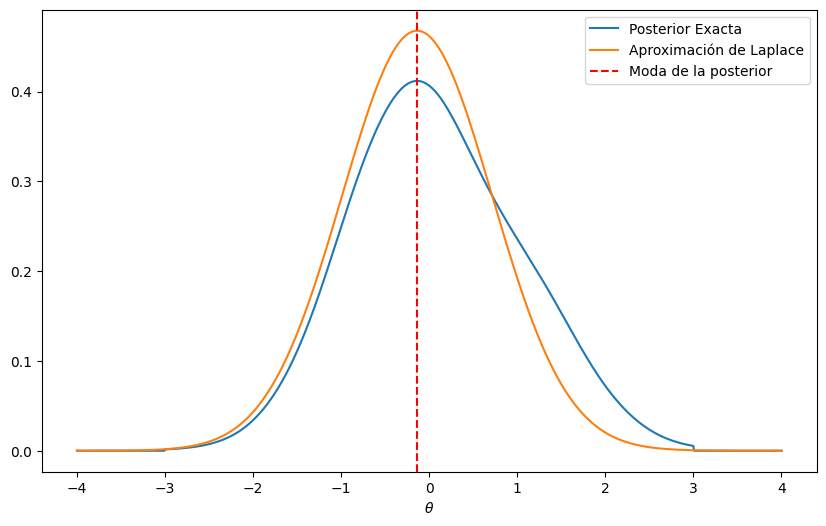

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(x, posterior_exacta, label='Posterior Exacta')
plt.plot(x, laplace_aprox, label='Aproximación de Laplace')
plt.axvline(moda_posterior, color='r', linestyle='--', label='Moda de la posterior')
plt.xlabel(r'$\theta$')
plt.legend()
plt.show()